<a href="https://colab.research.google.com/github/rayane2907/SARSA_vs_Qlearning/blob/main/MDP_Solution_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import gym
import random

# create Taxi environment
env = gym.make('Taxi-v3')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
# create a new instance of taxi, and get the initial state
state = env.reset()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don

step: 0 out of 99
step: 1 out of 99
step: 2 out of 99
step: 3 out of 99
step: 4 out of 99
step: 5 out of 99
step: 6 out of 99
step: 7 out of 99
step: 8 out of 99
step: 9 out of 99
step: 10 out of 99
step: 11 out of 99
step: 12 out of 99
step: 13 out of 99
step: 14 out of 99
step: 15 out of 99
step: 16 out of 99
step: 17 out of 99
step: 18 out of 99
step: 19 out of 99
step: 20 out of 99
step: 21 out of 99
step: 22 out of 99
step: 23 out of 99
step: 24 out of 99
step: 25 out of 99
step: 26 out of 99
step: 27 out of 99
step: 28 out of 99
step: 29 out of 99
step: 30 out of 99
step: 31 out of 99
step: 32 out of 99
step: 33 out of 99
step: 34 out of 99
step: 35 out of 99
step: 36 out of 99
step: 37 out of 99
step: 38 out of 99
step: 39 out of 99
step: 40 out of 99
step: 41 out of 99
step: 42 out of 99
step: 43 out of 99
step: 44 out of 99
step: 45 out of 99
step: 46 out of 99
step: 47 out of 99
step: 48 out of 99
step: 49 out of 99
step: 50 out of 99
step: 51 out of 99
step: 52 out of 99
ste

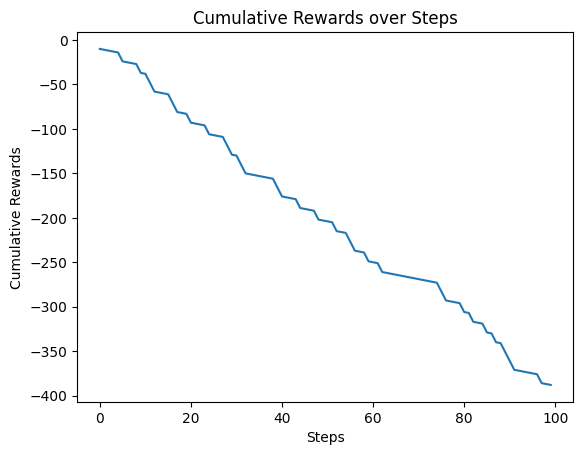

In [ ]:
#The first step is to give our agent an initial state of its environment. A state is how our agent will observe its environment.
#In Taxi, a state defines the current positions of the taxi, passenger, and pick-up and drop-off locations.
# Next, we'll run a for-loop to cycle through the game. At each iteration, our agent will:
# Make a random action from the action space (0 - south, 1 - north, 2 - east, 3 - west, 4 - pick-up, 5 - drop-off)
# Receive the new state
import matplotlib.pyplot as plt
# create Taxi environment
env = gym.make('Taxi-v3')

# create a new instance of taxi, and get the initial state
state = env.reset()

num_steps = 99
cumulative_rewards = []

for s in range(num_steps + 1):
    print(f"step: {s} out of {num_steps}")

    # sample a random action from the list of available actions
    action = env.action_space.sample()

    # perform this action on the environment
    _, reward, _, _ = env.step(action)

    # accumulate rewards
    cumulative_rewards.append(reward)

    # print the new state
    env.render()

# end this instance of the taxi environment
env.close()

# Plot cumulative rewards
plt.plot(np.arange(0, num_steps + 1), np.cumsum(cumulative_rewards))
plt.title('Cumulative Rewards over Steps')
plt.xlabel('Steps')
plt.ylabel('Cumulative Rewards')
plt.show()

In [ ]:
state_size = env.observation_space.n  # total number of states (S)
action_size = env.action_space.n      # total number of actions (A)

# initialize a qtable with 0's for all Q-values
qtable = np.zeros((state_size, action_size))

In [ ]:
# hyperparameters to tune
num_steps = 110
learning_rate = 10**-8
discount_rate = 0.8

#RL parameters for learning
R = np.zeros([state_size, action_size, state_size])
T = np.zeros([state_size, action_size, state_size])
V = np.zeros([env.observation_space.n])
Q = np.zeros([env.observation_space.n, env.action_space.n])

print("Taxi-v3")
print("Actions: ", action_size)
print("States: ", state_size)
print(env.env.desc)

for state in range(state_size):
    for action in range(action_size):
        for transition in env.env.P[state][action]:
            probability, next_state, reward, done = transition
            R[state, action, next_state] = reward
            T[state, action, next_state] = probability
        T[state, action, :] /= np.sum(T[state, action, :])

value_fn = np.zeros([state_size])

for i in range(num_steps):
    previous_value_fn = value_fn.copy()
    Q = np.einsum('ijk,ijk -> ij', T, R + discount_rate* value_fn)
    value_fn = np.max(Q, axis=1)
    #if np.max(np.abs(value_fn - previous_value_fn)) < learning_rate:
           #break
    policy = np.argmax(Q, axis=1)
iters = i + 1
print(len(value_fn))
print("Value Iteration",value_fn)
print("Iterations: ", iters)

Taxi-v3
Actions:  6
States:  500
[[b'+' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'+']
 [b'|' b'R' b':' b' ' b'|' b' ' b':' b' ' b':' b'G' b'|']
 [b'|' b' ' b':' b' ' b'|' b' ' b':' b' ' b':' b' ' b'|']
 [b'|' b' ' b':' b' ' b':' b' ' b':' b' ' b':' b' ' b'|']
 [b'|' b' ' b'|' b' ' b':' b' ' b'|' b' ' b':' b' ' b'|']
 [b'|' b'Y' b'|' b' ' b':' b' ' b'|' b'B' b':' b' ' b'|']
 [b'+' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'+']]
500
Value Iteration [ 4.16666667e+01  2.82936747e+00  1.41146667e+01  4.78670933e+00
 -3.68645011e+00  2.82936747e+00 -3.68645011e+00 -2.43447287e+00
  2.82936747e+00 -1.79309109e+00  1.41146667e+01 -9.91363858e-01
 -2.94757830e+00 -1.79309109e+00 -2.94757830e+00  4.78670933e+00
  5.33333333e+01  4.78670933e+00  1.88933333e+01  7.23338667e+00
  3.23333333e+01  1.26349397e+00  1.02917333e+01  2.82936747e+00
 -3.35806264e+00  4.78670933e+00 -3.35806264e+00 -1.79309109e+00
  1.26349397e+00 -2.43447287e+00  1.02917333e+01 -1.79309109e+00
 -2.43447287e+00 -9.

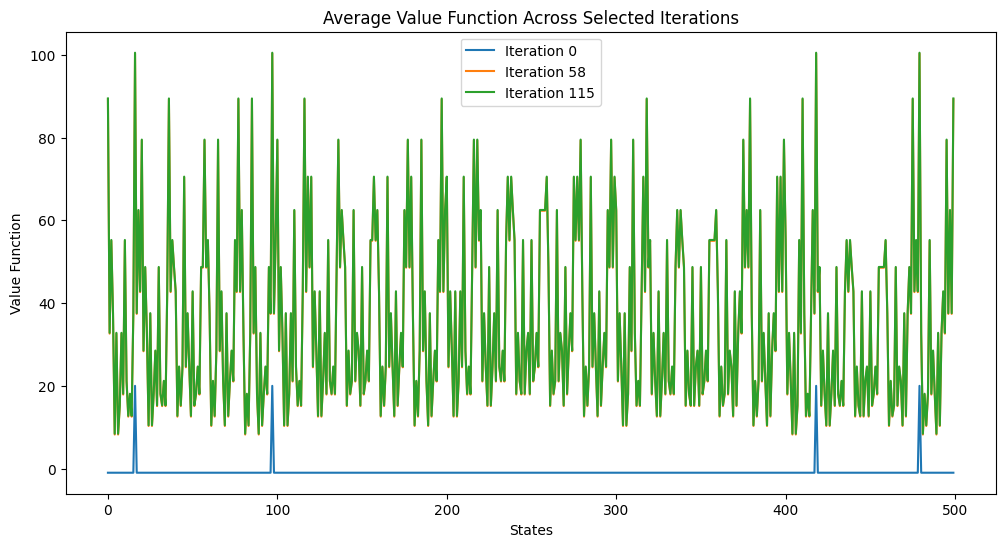

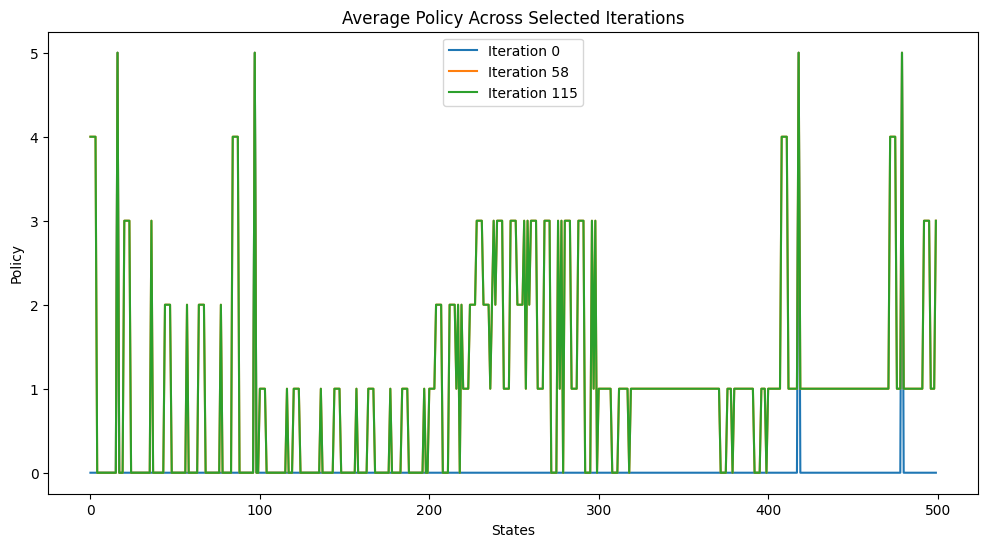

In [ ]:
import matplotlib.pyplot as plt

def initialize_mdp(env):
    state_size = env.observation_space.n
    action_size = env.action_space.n
    R = np.zeros((state_size, action_size, state_size))
    T = np.zeros((state_size, action_size, state_size))
    for state in range(state_size):
        for action in range(action_size):
            for transition in env.env.P[state][action]:
                probability, next_state, reward, done = transition
                R[state, action, next_state] = reward
                T[state, action, next_state] = probability
            T[state, action, :] /= np.sum(T[state, action, :])
    return R, T

def value_iteration(env, discount_rate=0.9, learning_rate=1e-4, num_steps=1000):
    state_size = env.observation_space.n
    action_size = env.action_space.n
    R, T = initialize_mdp(env)

    value_fn_history = []
    policy_history = []

    value_fn = np.zeros([state_size])

    for i in range(num_steps):
        previous_value_fn = value_fn.copy()
        Q = np.einsum('ijk,ijk -> ij', T, R + discount_rate * value_fn)
        value_fn = np.max(Q, axis=1)
        if np.max(np.abs(value_fn - previous_value_fn)) < learning_rate:
            break

        policy = np.argmax(Q, axis=1)

        # Save history for visualization
        value_fn_history.append(value_fn.copy())
        policy_history.append(policy.copy())

    return policy, value_fn, value_fn_history, policy_history

import numpy as np
import gym
import matplotlib.pyplot as plt

def initialize_mdp(env):
    state_size = env.observation_space.n
    action_size = env.action_space.n
    R = np.zeros((state_size, action_size, state_size))
    T = np.zeros((state_size, action_size, state_size))
    for state in range(state_size):
        for action in range(action_size):
            for transition in env.env.P[state][action]:
                probability, next_state, reward, done = transition
                R[state, action, next_state] = reward
                T[state, action, next_state] = probability
            T[state, action, :] /= np.sum(T[state, action, :])
    return R, T

def value_iteration(env, discount_rate=0.9, learning_rate=1e-4, num_steps=1000):
    state_size = env.observation_space.n
    action_size = env.action_space.n
    R, T = initialize_mdp(env)

    value_fn_history = []
    policy_history = []

    value_fn = np.zeros([state_size])

    for i in range(num_steps):
        previous_value_fn = value_fn.copy()
        Q = np.einsum('ijk,ijk -> ij', T, R + discount_rate * value_fn)
        value_fn = np.max(Q, axis=1)
        if np.max(np.abs(value_fn - previous_value_fn)) < learning_rate:
            break

        policy = np.argmax(Q, axis=1)

        # Save history for visualization
        value_fn_history.append(value_fn.copy())
        policy_history.append(policy.copy())

    return policy, value_fn, value_fn_history, policy_history

def plot_simple_learning_progress(value_fn_history, policy_history):
    num_iterations = len(value_fn_history)
    states = np.arange(len(value_fn_history[0]))

    # Select a few key iterations for plotting
    selected_iterations = [0, num_iterations // 2, num_iterations - 1]

    # Plot average value function across selected iterations
    plt.figure(figsize=(12, 6))
    for i in selected_iterations:
        plt.plot(states, value_fn_history[i], label=f'Iteration {i}')
    plt.title('Average Value Function Across Selected Iterations')
    plt.xlabel('States')
    plt.ylabel('Value Function')
    plt.legend()
    plt.show()

    # Plot average policy across selected iterations
    plt.figure(figsize=(12, 6))
    for i in selected_iterations:
        plt.plot(states, policy_history[i], label=f'Iteration {i}')
    plt.title('Average Policy Across Selected Iterations')
    plt.xlabel('States')
    plt.ylabel('Policy')
    plt.legend()
    plt.show()

# Usage
env = gym.make('Taxi-v3')
policy, value_function, value_fn_history, policy_history = value_iteration(env)
plot_simple_learning_progress(value_fn_history, policy_history)

